In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.utils import resample 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import scale 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA 
import  matplotlib.colors as colors 

In [2]:
df = pd.read_csv('default of credit card clients.csv', header=1)
df.head() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.rename({'default payment next month' : 'DEFAULT'}, axis='columns', inplace=True)
df.head() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.drop('ID', axis=1, inplace=True)
df.head() 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.dtypes 

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [6]:
df['SEX'].unique() 

array([2, 1])

In [7]:
df['EDUCATION'].unique() 

array([2, 1, 3, 5, 4, 6, 0])

In [8]:
df['MARRIAGE'].unique() 

array([1, 2, 3, 0])

In [9]:
df['AGE'].unique() 

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

### Missing Data 

In [10]:
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)]) 

68

In [11]:
len(df) 

30000

In [12]:
df_no_missing = df.loc[(df['EDUCATION'] != 0 ) & (df['MARRIAGE'] != 0)] 

In [13]:
len(df_no_missing)

29932

In [14]:
df_no_missing['EDUCATION'].unique() 

array([2, 1, 3, 5, 4, 6])

In [15]:
df_no_missing['MARRIAGE'].unique() 

array([1, 2, 3])

### Downsample the data 

In [16]:
df_no_default = df_no_missing[df_no_missing['DEFAULT'] ==0] 
df_default =df_no_missing[df_no_missing['DEFAULT'] == 1] 

In [17]:

df_no_default_downsampled = resample(df_no_default,
                                     replace=False,
                                     n_samples=1000,
                                     random_state=42)

len(df_no_default_downsampled)

1000

In [18]:
df_default_downsampled = resample(df_default,
                                  replace=False,
                                  n_samples=1000,
                                  random_state=42)

len(df_default_downsampled)

1000

In [19]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
len(df_downsample)

2000

In [20]:
X = df_downsample.drop('DEFAULT', axis=1).copy() 
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [21]:
y = df_downsample['DEFAULT'].copy() 
y.head() 

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

In [22]:
pd.get_dummies(X, columns=['MARRIAGE']).head() 

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
641,130000,2,3,28,0,0,0,0,-2,-2,...,0,2500,1000,0,0,0,0,True,False,False
4678,170000,1,3,29,0,0,0,0,0,0,...,33862,7200,7500,1200,1200,1500,1300,True,False,False
16004,180000,2,2,29,0,0,0,0,0,0,...,26176,1800,1800,1500,1056,950,1000,True,False,False
22974,210000,2,2,32,-2,-2,-2,-2,-2,-2,...,0,979,412,0,0,0,0,False,True,False
17535,190000,2,3,45,0,0,0,0,0,0,...,84811,3300,3331,3359,2663,2751,3000,True,False,False


In [23]:
X_encoded = pd.get_dummies(X, columns=['SEX',
                                       'EDUCATION',
                                       'MARRIAGE',
                                       'PAY_0',
                                       'PAY_2',
                                       'PAY_3',
                                       'PAY_4',
                                       'PAY_5',
                                       'PAY_6'])

X_encoded.head() 

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,False,True,False,False,False,False,False,False,False,False
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,False,False,False,True,False,False,False,False,False,False
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,False,False,False,True,False,False,False,False,False,False
22974,210000,32,355,975,410,0,0,0,979,412,...,False,True,False,False,False,False,False,False,False,False
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,False,False,False,True,False,False,False,False,False,False


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
X_train_scaled = scale(X_train) 
X_test_scaled = scale(X_test) 

In [25]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [27]:
y_pred = clf_svm.predict(X_test_scaled)
y_pred 

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [28]:
from sklearn.metrics import accuracy_score, classification_report 

print(f"Accuracy is: {accuracy_score(y_test, y_pred)}")
print(f"Classification report is: {classification_report(y_test, y_pred)}")

Accuracy is: 0.698
Classification report is:               precision    recall  f1-score   support

           0       0.68      0.78      0.73       257
           1       0.73      0.61      0.66       243

    accuracy                           0.70       500
   macro avg       0.70      0.70      0.69       500
weighted avg       0.70      0.70      0.70       500



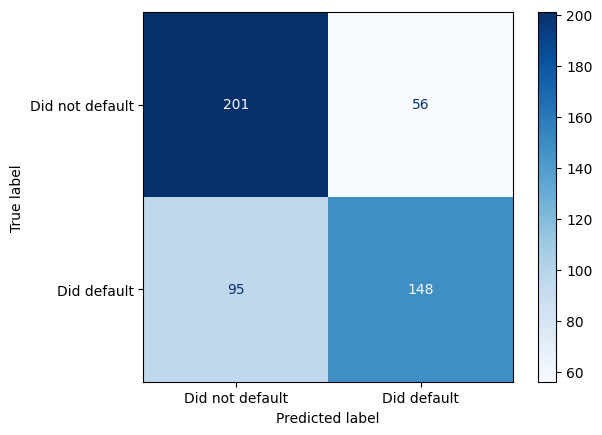

In [26]:
ConfusionMatrixDisplay.from_estimator(clf_svm,
                       X_test_scaled,
                       y_test,
                       display_labels=['Did not default', 'Did default'],
                       cmap='Blues')

- We will optimize parameters with cross validtion and gridsearchCV 

In [29]:
param_grid = [
    {'C':[0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0,
)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_) 

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


- Building, Evaluating the final model 

In [48]:
clf_svm = SVC(random_state=42, C=100, gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)


,C,100
,kernel,'rbf'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [33]:
y_pred2 = clf_svm.predict(X_test_scaled)
y_pred2 

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,

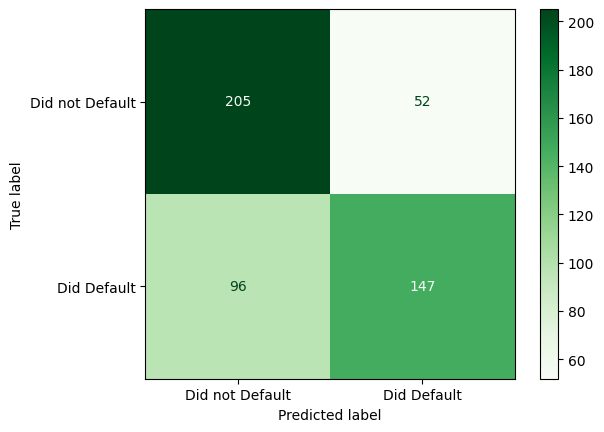

In [49]:
ConfusionMatrixDisplay.from_estimator(clf_svm,
                                      X_test_scaled,
                                      y_test,
                                      display_labels=['Did not Default', 'Did Default'],
                                      cmap='Greens')

In [50]:
len(df_downsample.columns)

24

In [51]:
from sklearn.metrics import accuracy_score, classification_report 

print(f"Accuracy is: {accuracy_score(y_test, y_pred2)}")
print(f"Classification report is: {classification_report(y_test, y_pred2)}")

Accuracy is: 0.704
Classification report is:               precision    recall  f1-score   support

           0       0.68      0.80      0.73       257
           1       0.74      0.60      0.67       243

    accuracy                           0.70       500
   macro avg       0.71      0.70      0.70       500
weighted avg       0.71      0.70      0.70       500



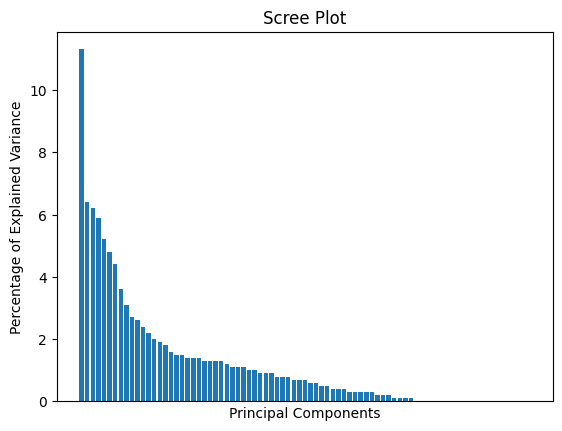

In [52]:
pca = PCA() 
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1) 
labels = [str(x) for x in range(1, len(per_var)+1)] 

plt.bar(x=range(1, len(per_var)+1), height=per_var) 
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False) 
plt.ylabel('Percentage of Explained Variance') 
plt.xlabel('Principal Components') 
plt.title('Scree Plot')
plt.show()

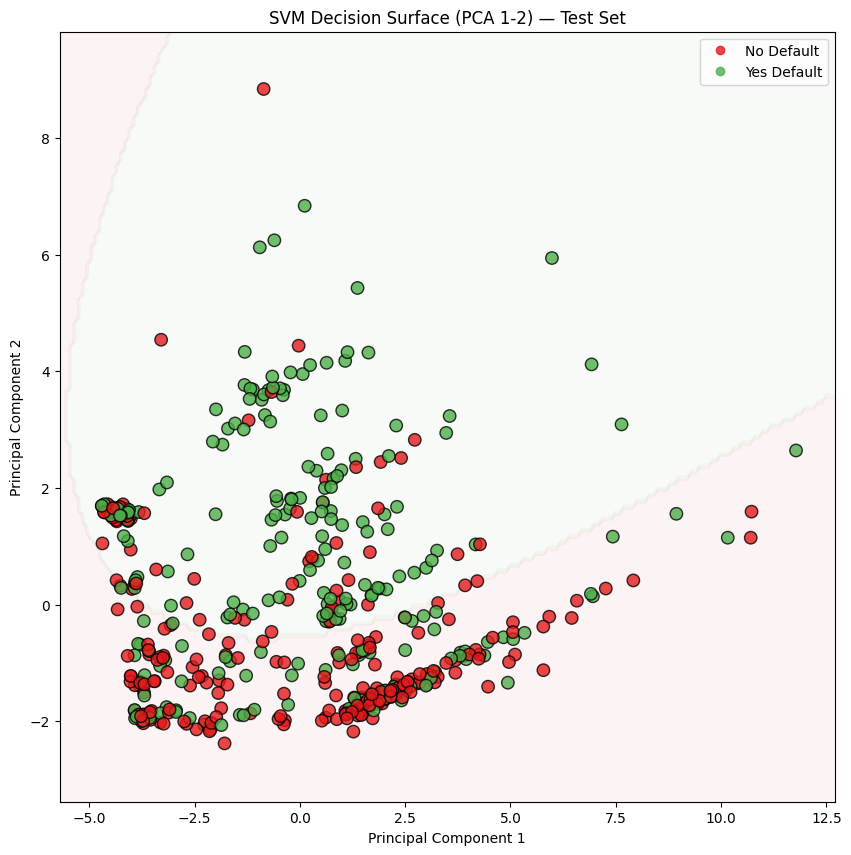

In [53]:
# --- PCA Transformation ---
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.colors as colors
import numpy as np
import matplotlib.pyplot as plt

# Apply PCA on the scaled training data
pca = PCA(n_components=2)  # use first 2 components for visualization
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train an SVM only on the first two PCs for 2D visualization
clf_svm_pca = SVC(random_state=42, C=100, gamma=0.001)
clf_svm_pca.fit(X_train_pca, y_train)

# Predict on the test PCA data (for color labels)
y_pred_pca = clf_svm_pca.predict(X_test_pca)

# --- Decision surface plot ---
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict for each point in the mesh grid
Z = clf_svm_pca.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

# --- Visualization ---
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(xx, yy, Z, alpha=0.2, cmap=colors.ListedColormap(['#f4cccc', '#d9ead3']))

# Scatter actual test points, color by true label
cmap_points = colors.ListedColormap(['#e41a1c', '#4daf4a'])
scatter = ax.scatter(X_test_pca[:, 0],
                     X_test_pca[:, 1],
                     c=y_test,
                     cmap=cmap_points,
                     s=80,
                     edgecolors='k',
                     alpha=0.8)

# Add legend
legend = ax.legend(scatter.legend_elements()[0],
                   ['No Default', 'Yes Default'],
                   loc="upper right")

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('SVM Decision Surface (PCA 1-2) — Test Set')
plt.show()


- The pink part of the graph is the area were all datapoints will be predicted to have not defaulted. The yellow part of the graph is the area where all datapoints will be predicted to have defaulted. The the dots are datapoints in the training dataset and are color coded by their known classifications: red is for those that did not default and green is for those that defaulted.

- NOTE: The results are show the training data, not the testing data and thus, do not match the confusion matrices that we generated. Also, remember that for this picture, we only fit the SVM to the first two principal components instead of all the data, and thus, this is only an approximation of the true classifier. Lastly, because the skree plot showed that PC2 was not very different from PC3 or PC4, this is not a very good approximation.

In [63]:
new_data = [50000, 1, 2, 1, 25, 4, 4, 4, 4,4,2, 0, 0, 0, 0, 4, 2, 0, 10000, 2000, 100, 400, 5000 ]

#To Predcit on new data we have to do the following steps:
# 1. Build new sample as DataFrame with same raw column names
new_data_df = pd.DataFrame([new_data], columns=X.columns)

# 2. Apply same encoding as training
new_data_encoded = pd.get_dummies(new_data_df, columns=['SEX','EDUCATION','MARRIAGE',
                                                        'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
new_data_encoded = new_data_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# 3. Scale using the same scaler
new_data_scaled = scale(new_data_encoded)

# 4. (Optional) PCA transform if using PCA model
new_data_pca = pca.transform(new_data_scaled)

# 5. Predict
prediction = clf_svm.predict(new_data_scaled)      # for full model
# or:
# prediction = clf_svm_pca.predict(new_data_pca)   # for PCA model

print("Predicted class:", "Default" if prediction[0]==1 else "No Default")



Predicted class: No Default


In [64]:
import pickle 

with open('SVM_creditCard.pkl', 'wb') as f:
    pickle.dump(clf_svm, f) 